## Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Importing Dataset

In [2]:
data = pd.read_csv('/Users/nikhil/Downloads/IMDB_Movies.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,2701,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


## Data Understanding

In [3]:
data.shape

(5043, 28)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.00,140.19,121.60,1.00,50.00,110.00,195.00,813.00
duration,5028.00,107.20,25.20,7.00,93.00,103.00,118.00,511.00
director_facebook_likes,4939.00,686.51,2813.33,0.00,7.00,49.00,194.50,23000.00
actor_3_facebook_likes,5020.00,645.01,1665.04,0.00,133.00,371.50,636.00,23000.00
actor_1_facebook_likes,5036.00,6560.05,15020.76,0.00,614.00,988.00,11000.00,640000.00
gross,4159.00,48468407.53,68452990.44,162.00,5340987.50,25517500.00,62309437.50,760505847.00
num_voted_users,5043.00,83668.16,138485.26,5.00,8593.50,34359.00,96309.00,1689764.00
cast_total_facebook_likes,5043.00,9699.06,18163.80,0.00,1411.00,3090.00,13756.50,656730.00
facenumber_in_poster,5030.00,1.37,2.01,0.00,0.00,1.00,2.00,43.00
budget,4551.00,39752620.44,206114898.45,218.00,6000000.00,20000000.00,45000000.00,12215500000.00


In [5]:
data.describe(exclude='number').T

,count,unique,top,freq
color,5024,2,Color,4815
director_name,4939,2398,Steven Spielberg,26
actor_2_name,5030,3032,Morgan Freeman,20
genres,5043,914,Drama,236
actor_1_name,5036,2097,Robert De Niro,49
movie_title,5043,4917,Ben-Hur,3
actor_3_name,5020,3521,John Heard,8
plot_keywords,4890,4760,based on novel,4
movie_imdb_link,5043,4919,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,3
num_user_for_reviews,5023,955,1,51


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Remove Duplicates

Data has some duplicate data. It may be come during data collection process. First we have to remove these duplicate data point.

In [7]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(4998, 28)

## Tidying Movie Title Column

In [8]:
def tidy_mov(movie_title):
    return movie_title[: len(movie_title)-1]

data['movie_title'] = data.apply(lambda x: tidy_mov(x['movie_title']), axis=1)

## Data Cleaning

In [9]:
data.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

### Handle Missing Data

In [10]:
data = data.dropna(axis=0, subset=["director_name", 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_3_name','actor_2_name','actor_2_facebook_likes','actor_1_name','actor_1_facebook_likes','gross','budget','plot_keywords'])
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          6
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               38
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 60
movie_facebook_likes          0
dtype: int64

In [11]:
data.color.fillna(data['color'].mode().iloc[0], axis=0, inplace=True)
data['color'].isnull().sum()

0

In [12]:
data.num_critic_for_reviews.mean(),data.num_critic_for_reviews.median()

(164.22871364946292, 135.0)

In [13]:
data.num_critic_for_reviews.fillna(data['num_critic_for_reviews'].median(), axis=0, inplace=True)
data['num_critic_for_reviews'].isnull().sum()

0

In [14]:
data.duration.mean(), data.duration.median()

(110.03982184962013, 106.0)

In [15]:
data.duration.fillna(data['duration'].median(), axis=0, inplace=True)
data['duration'].isnull().sum()

0

In [16]:
data.facenumber_in_poster.fillna(data['facenumber_in_poster'].median(), axis=0, inplace=True)
data['facenumber_in_poster'].isnull().sum()

0

In [17]:
data.language.fillna(data['language'].mode().iloc[0], axis=0, inplace=True)
data['language'].isnull().sum()

0

In [18]:
data.content_rating.fillna('Not Rated', axis=0, inplace=True)
data['content_rating'].isnull().sum()

0

In [19]:
data.aspect_ratio.fillna(data['aspect_ratio'].mode().iloc[0], axis=0, inplace=True)
data['aspect_ratio'].isnull().sum()

0

In [20]:
data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [21]:
data['num_user_for_reviews'] = data['num_user_for_reviews'].astype('float64')

In [22]:
data['profit'] = data['gross'] - data['budget']
data.shape

(3817, 29)

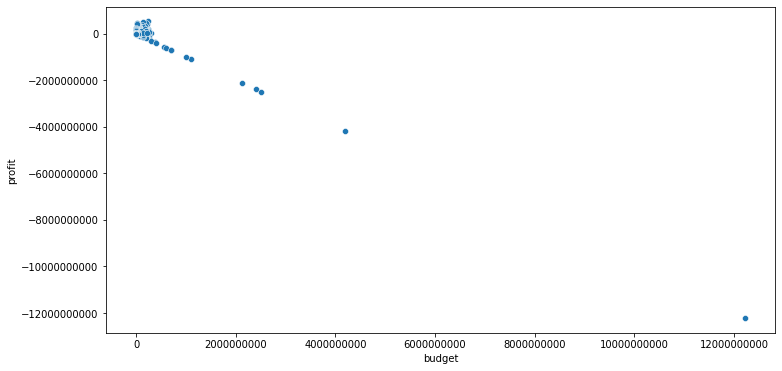

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['budget'], y=data['profit'])
plt.ticklabel_format(style='plain')

## Handling Outliers

From the above chart we can see there are some data points who are outliers in the data. I have removed those outliers as they are hindrance in accurate insights.

In [24]:
pro_out_ind = data[data['profit'] <= -2000000000].index
print(pro_out_ind)
data.drop(pro_out_ind, axis=0, inplace=True)

Int64Index([2323, 2334, 2988, 3005, 3859], dtype='int64')


In [25]:
bud_out_ind = data[data['budget'] > 250000000].index
print(bud_out_ind)
data.drop(bud_out_ind, axis=0, inplace=True)

Int64Index([1, 5, 6, 7, 1016, 1338, 2740, 3075, 3273, 3311, 3423, 3461, 3851,
            4542],
           dtype='int64')


In [ ]:
data.sort_values(by=['profit'], ascending=False)

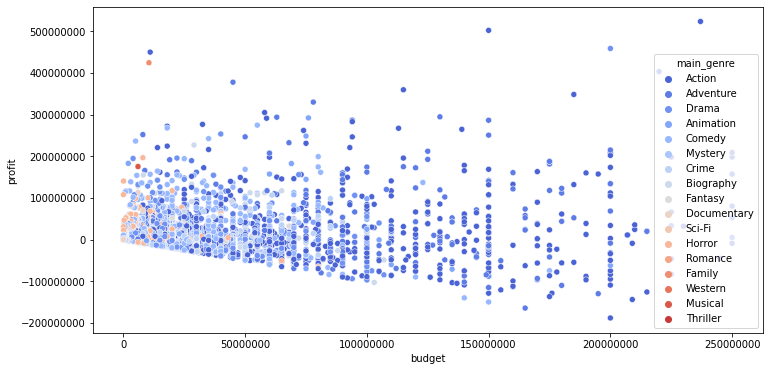

In [59]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['budget'], y=data['profit'], hue=df['main_genre'], palette='coolwarm')
plt.ticklabel_format(style='plain')

In [28]:
imdb_top_250 = data[data['num_voted_users'] > 25000].sort_values(by=['imdb_score'], ascending=False).head(250)

In [29]:
rank = []
for i in range(250):
    rank.append(i+1)

In [30]:
imdb_top_250['rank'] = rank
imdb_top_250.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,rank
1937,Color,Frank Darabont,199.00,142.00,0.00,461.00,Jeffrey DeMunn,11000.00,28341469.00,Crime|Drama,...,USA,R,25000000.00,1994.00,745.00,9.30,1.85,108000,3341469.00,1
3466,Color,Francis Ford Coppola,208.00,175.00,0.00,3000.00,Marlon Brando,14000.00,134821952.00,Crime|Drama,...,USA,R,6000000.00,1972.00,10000.00,9.20,1.85,43000,128821952.00,2
66,Color,Christopher Nolan,645.00,152.00,22000.00,11000.00,Heath Ledger,23000.00,533316061.00,Action|Crime|Drama|Thriller,...,USA,PG-13,185000000.00,2008.00,13000.00,9.00,2.35,37000,348316061.00,3
2837,Color,Francis Ford Coppola,149.00,220.00,0.00,3000.00,Al Pacino,22000.00,57300000.00,Crime|Drama,...,USA,R,13000000.00,1974.00,14000.00,9.00,1.85,14000,44300000.00,4
3355,Color,Quentin Tarantino,215.00,178.00,16000.00,857.00,Eric Stoltz,13000.00,107930000.00,Crime|Drama,...,USA,R,8000000.00,1994.00,902.00,8.90,2.35,45000,99930000.00,5


In [99]:
imdb_top_250.head(250)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,rank
1937,Color,Frank Darabont,199.00,142.00,0.00,461.00,Jeffrey DeMunn,11000.00,28341469.00,Crime|Drama,...,USA,R,25000000.00,1994.00,745.00,9.30,1.85,108000,3341469.00,1
3466,Color,Francis Ford Coppola,208.00,175.00,0.00,3000.00,Marlon Brando,14000.00,134821952.00,Crime|Drama,...,USA,R,6000000.00,1972.00,10000.00,9.20,1.85,43000,128821952.00,2
66,Color,Christopher Nolan,645.00,152.00,22000.00,11000.00,Heath Ledger,23000.00,533316061.00,Action|Crime|Drama|Thriller,...,USA,PG-13,185000000.00,2008.00,13000.00,9.00,2.35,37000,348316061.00,3
2837,Color,Francis Ford Coppola,149.00,220.00,0.00,3000.00,Al Pacino,22000.00,57300000.00,Crime|Drama,...,USA,R,13000000.00,1974.00,14000.00,9.00,1.85,14000,44300000.00,4
3355,Color,Quentin Tarantino,215.00,178.00,16000.00,857.00,Eric Stoltz,13000.00,107930000.00,Crime|Drama,...,USA,R,8000000.00,1994.00,902.00,8.90,2.35,45000,99930000.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,Color,Ang Lee,287.00,120.00,0.00,5.00,Pei-Pei Cheng,103.00,128067808.00,Action|Drama|Romance,...,Taiwan,PG-13,15000000.00,2000.00,21.00,7.90,2.35,0,113067808.00,246
353,Color,John Lasseter,191.00,82.00,487.00,967.00,John Ratzenberger,15000.00,245823397.00,Adventure|Animation|Comedy|Family|Fantasy,...,USA,G,90000000.00,1999.00,1000.00,7.90,1.85,0,155823397.00,247
2487,Color,George Cukor,82.00,170.00,165.00,244.00,Rex Harrison,453.00,72000000.00,Drama|Family|Musical|Romance,...,USA,Approved,17000000.00,1964.00,272.00,7.90,2.20,0,55000000.00,248
2177,Color,Tim Burton,111.00,105.00,13000.00,658.00,Dianne Wiest,40000.00,56362352.00,Fantasy|Romance,...,USA,PG-13,20000000.00,1990.00,967.00,7.90,1.85,16000,36362352.00,249


In [31]:
imdb_top_foreign = data[(data['language'] != 'English')].sort_values(by=['imdb_score'], ascending=False)

In [32]:
foreign_film_rank = []
for i in range(len(imdb_top_foreign)):
    foreign_film_rank.append(i+1)
    
imdb_top_foreign['rank'] = foreign_film_rank
imdb_top_foreign.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,rank
4498,Color,Sergio Leone,181.00,142.00,0.00,24.00,Luigi Pistilli,16000.00,6100000.00,Western,...,Italy,Approved,1200000.00,1966.00,34.00,8.90,2.35,20000,4900000.00,1
4029,Color,Fernando Meirelles,214.00,135.00,353.00,40.00,Seu Jorge,1000.00,7563397.00,Crime|Drama,...,Brazil,R,3300000.00,2002.00,69.00,8.70,1.85,28000,4263397.00,2
4747,Black and White,Akira Kurosawa,153.00,202.00,0.00,4.00,Minoru Chiaki,304.00,269061.00,Action|Adventure|Drama,...,Japan,Unrated,2000000.00,1954.00,8.00,8.70,1.37,11000,-1730939.00,3
2373,Color,Hayao Miyazaki,246.00,125.00,6000.00,7.00,Ryûnosuke Kamiki,17.00,10049886.00,Adventure|Animation|Family|Fantasy,...,Japan,PG,19000000.00,2001.00,10.00,8.60,1.85,28000,-8950114.00,4
3931,Color,Ron Fricke,115.00,102.00,330.00,0.00,Balinese Tari Legong Dancers,48.00,2601847.00,Documentary|Music,...,USA,PG-13,4000000.00,2011.00,0.00,8.50,2.35,26000,-1398153.00,5


In [33]:
top_directors = data.sort_values(by=['imdb_score','director_name'],ascending=[False,True]).head(10)
top_directors

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
1937,Color,Frank Darabont,199.00,142.00,0.00,461.00,Jeffrey DeMunn,11000.00,28341469.00,Crime|Drama,...,English,USA,R,25000000.00,1994.00,745.00,9.30,1.85,108000,3341469.00
3466,Color,Francis Ford Coppola,208.00,175.00,0.00,3000.00,Marlon Brando,14000.00,134821952.00,Crime|Drama,...,English,USA,R,6000000.00,1972.00,10000.00,9.20,1.85,43000,128821952.00
66,Color,Christopher Nolan,645.00,152.00,22000.00,11000.00,Heath Ledger,23000.00,533316061.00,Action|Crime|Drama|Thriller,...,English,USA,PG-13,185000000.00,2008.00,13000.00,9.00,2.35,37000,348316061.00
2837,Color,Francis Ford Coppola,149.00,220.00,0.00,3000.00,Al Pacino,22000.00,57300000.00,Crime|Drama,...,English,USA,R,13000000.00,1974.00,14000.00,9.00,1.85,14000,44300000.00
339,Color,Peter Jackson,328.00,192.00,0.00,416.00,Billy Boyd,5000.00,377019252.00,Action|Adventure|Drama|Fantasy,...,English,USA,PG-13,94000000.00,2003.00,857.00,8.90,2.35,16000,283019252.00
3355,Color,Quentin Tarantino,215.00,178.00,16000.00,857.00,Eric Stoltz,13000.00,107930000.00,Crime|Drama,...,English,USA,R,8000000.00,1994.00,902.00,8.90,2.35,45000,99930000.00
4498,Color,Sergio Leone,181.00,142.00,0.00,24.00,Luigi Pistilli,16000.00,6100000.00,Western,...,Italian,Italy,Approved,1200000.00,1966.00,34.00,8.90,2.35,20000,4900000.00
1874,Black and White,Steven Spielberg,174.00,185.00,14000.00,212.00,Embeth Davidtz,14000.00,96067179.00,Biography|Drama|History,...,English,USA,R,22000000.00,1993.00,795.00,8.90,1.85,41000,74067179.00
97,Color,Christopher Nolan,642.00,148.00,22000.00,23000.00,Tom Hardy,29000.00,292568851.00,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,160000000.00,2010.00,27000.00,8.80,2.35,175000,132568851.00
683,Color,David Fincher,315.00,151.00,21000.00,637.00,Meat Loaf,11000.00,37023395.00,Drama,...,English,USA,R,63000000.00,1999.00,783.00,8.80,2.35,48000,-25976605.00


In [34]:
df = data.copy()

In [35]:
df['main_genre'] = df['genres'].str.split('|').str[0]
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,main_genre
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000,523505847.00,Action
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000,-44925825.00,Action
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000,198130642.00,Action
8,Color,Joss Whedon,635.00,141.00,0.00,19000.00,Robert Downey Jr.,26000.00,458991599.00,Action|Adventure|Sci-Fi,...,USA,PG-13,250000000.00,2015.00,21000.00,7.50,2.35,118000,208991599.00,Action
9,Color,David Yates,375.00,153.00,282.00,10000.00,Daniel Radcliffe,25000.00,301956980.00,Adventure|Family|Fantasy|Mystery,...,UK,PG,250000000.00,2009.00,11000.00,7.50,2.35,10000,51956980.00,Adventure


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Documentary'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Romance'),
  Text(13, 0, 'Family'),
  Text(14, 0, 'Western'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Thriller')])

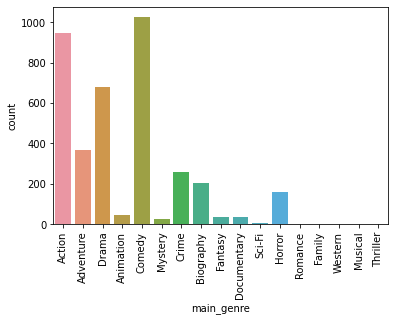

In [36]:
sns.countplot(x=df['main_genre'])
plt.xticks(rotation=90)

In [37]:
Meryl_Streep = df[(df['actor_1_name'] == 'Meryl Streep')]
Leo_Caprio = df[(df['actor_1_name'] == 'Leonardo DiCaprio')]
Brad_Pitt = df[(df['actor_1_name'] == 'Brad Pitt')]

In [38]:
combined = df[(df['actor_1_name'] == 'Meryl Streep') | (df['actor_1_name'] == 'Leonardo DiCaprio') | (df['actor_1_name'] == 'Brad Pitt')]

In [39]:
print(round(Meryl_Streep['num_critic_for_reviews'].mean(),2)),
print(round(Leo_Caprio['num_critic_for_reviews'].mean(),2)),
print(round(Brad_Pitt['num_critic_for_reviews'].mean(),2))

181.45
330.19
245.0


In [40]:
print(round(Meryl_Streep['num_user_for_reviews'].mean(),2)),
print(round(Leo_Caprio['num_user_for_reviews'].mean(),2)),
print(round(Brad_Pitt['num_user_for_reviews'].mean(),2))

297.18
914.48
742.35


In [48]:
df['decade'] = df.title_year.apply(lambda x: (x//10)*10)

In [90]:
temp = df.groupby(by=['decade'])['num_voted_users'].sum()
temp = temp.to_frame()


<AxesSubplot: xlabel='decade', ylabel='num_voted_users'>

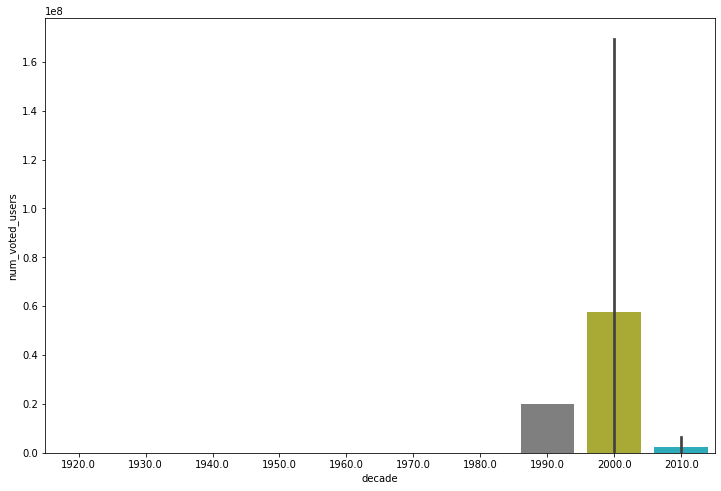

In [95]:
plt.figure(figsize=(12,8))
sns.barplot(x = df['decade'], y=df_by_decade['num_voted_users'])

<AxesSubplot: xlabel='decade', ylabel='count'>

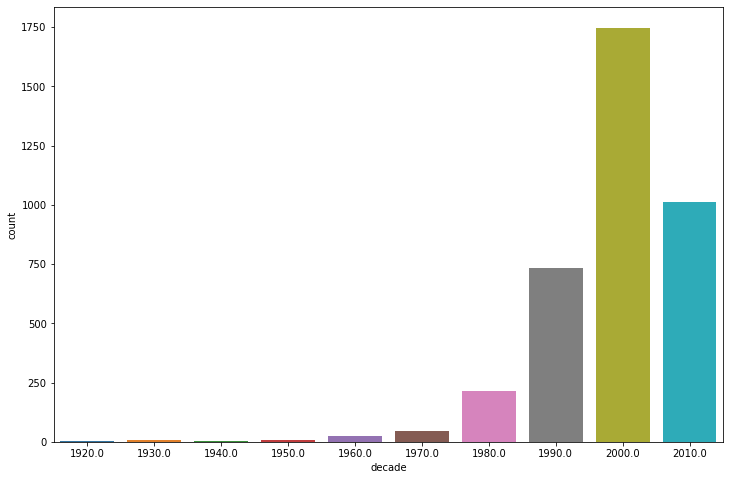

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['decade'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Documentary'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Romance'),
  Text(13, 0, 'Family'),
  Text(14, 0, 'Western'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Thriller')])

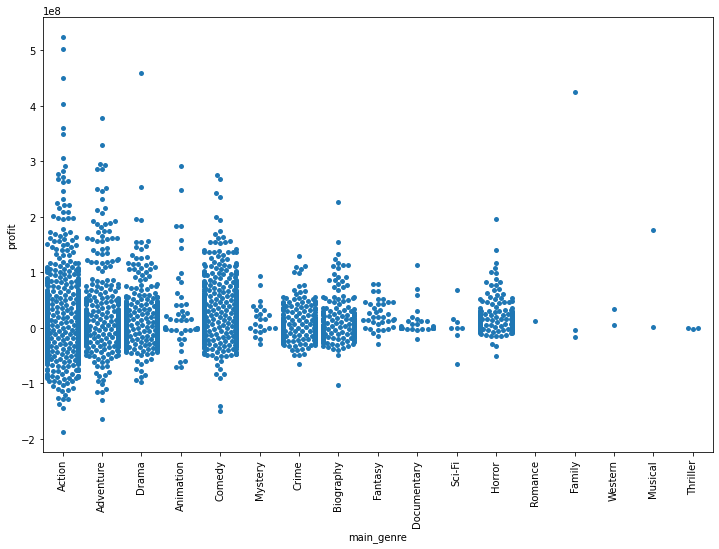

In [57]:
plt.figure(figsize=(12,8))
sns.swarmplot(x=df['main_genre'], y=df['profit'])
plt.xticks(rotation=90)

In [86]:
df.groupby(['main_genre']).value_countsb
# ['title_year','budget','gross']

<bound method DataFrameGroupBy.value_counts of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fa63b9a7640>>

In [96]:
df.to_csv('df.csv')